<a href="https://colab.research.google.com/github/VittorioBartolomeoSecondin/DVISProject-CAValli_Team/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and connecting to Google Drive

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json
import csv
import requests
import os
import zipfile
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the data

In [131]:
all_files = glob.glob("/content/drive/MyDrive/DV_project/*.xlsx")
all_files.sort()
print(all_files)

['/content/drive/MyDrive/DV_project/EarlyLeavers_18_24.xlsx', '/content/drive/MyDrive/DV_project/ICT_age.xlsx', '/content/drive/MyDrive/DV_project/ICT_sex.xlsx', '/content/drive/MyDrive/DV_project/ICT_skills_obtaining.xlsx', '/content/drive/MyDrive/DV_project/InEducation.xlsx', '/content/drive/MyDrive/DV_project/NEET.xlsx', '/content/drive/MyDrive/DV_project/Skills_level.xlsx', '/content/drive/MyDrive/DV_project/Skills_sex.xlsx', '/content/drive/MyDrive/DV_project/TertiaryEducation.xlsx']


In [132]:
selected_columns = ['TIME', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
rows_to_skip = list(range(0, 9)) + [10, 11, 12] + list(range(47, 53))

neet_sheet1 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 1', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet2 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 2', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet3 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 3', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet4 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 4', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet5 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 5', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet6 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 6', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet7 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 7', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet8 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 8', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet9 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 9', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet10 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 10', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet11 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 11', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)
neet_sheet12 = pd.read_excel('/content/drive/MyDrive/DV_project/NEET.xlsx', sheet_name = 'Sheet 12', skiprows = rows_to_skip, na_values = ':', usecols = selected_columns)

neet_sheet1.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet2.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet3.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet4.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet5.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet6.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet7.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet8.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet9.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet10.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet11.rename(columns = {'TIME': 'Country'}, inplace = True)
neet_sheet12.rename(columns = {'TIME': 'Country'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

In [133]:
country_abbreviations = {
    'European Union - 27 countries (from 2020)': 'EU',
    'Euro area – 20 countries (from 2023)': 'EA',
    'Belgium': 'BEL',
    'Bulgaria': 'BGR',
    'Czechia': 'CZE',
    'Denmark': 'DNK',
    'Germany': 'DEU',
    'Estonia': 'EST',
    'Ireland': 'IRL',
    'Greece': 'GRC',
    'Spain': 'ESP',
    'France': 'FRA',
    'Croatia': 'HRV',
    'Italy': 'ITA',
    'Cyprus': 'CYP',
    'Latvia': 'LVA',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Hungary': 'HUN',
    'Malta': 'MLT',
    'Netherlands': 'NLD',
    'Austria': 'AUT',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Romania': 'ROU',
    'Slovenia': 'SVN',
    'Slovakia': 'SVK',
    'Finland': 'FIN',
    'Sweden': 'SWE',
    'Iceland': 'ISL',
    'Norway': 'NOR',
    'Switzerland': 'CHE',
    'Montenegro': 'MNE',
    'North Macedonia': 'MKD',
    'Serbia': 'SRB',
    'Türkiye': 'TUR',
}

In [134]:
country_abbreviations_reversed = {value: key for key, value in country_abbreviations.items()}

In [135]:
neet_sheet1['Abbreviation'] = neet_sheet1['Country'].map(country_abbreviations)
neet_sheet2['Abbreviation'] = neet_sheet2['Country'].map(country_abbreviations)
neet_sheet3['Abbreviation'] = neet_sheet3['Country'].map(country_abbreviations)
neet_sheet4['Abbreviation'] = neet_sheet4['Country'].map(country_abbreviations)
neet_sheet5['Abbreviation'] = neet_sheet5['Country'].map(country_abbreviations)
neet_sheet6['Abbreviation'] = neet_sheet6['Country'].map(country_abbreviations)
neet_sheet7['Abbreviation'] = neet_sheet7['Country'].map(country_abbreviations)
neet_sheet8['Abbreviation'] = neet_sheet8['Country'].map(country_abbreviations)
neet_sheet9['Abbreviation'] = neet_sheet9['Country'].map(country_abbreviations)
neet_sheet10['Abbreviation'] = neet_sheet10['Country'].map(country_abbreviations)
neet_sheet11['Abbreviation'] = neet_sheet11['Country'].map(country_abbreviations)
neet_sheet12['Abbreviation'] = neet_sheet12['Country'].map(country_abbreviations)

# Some visualizations

## Linechart

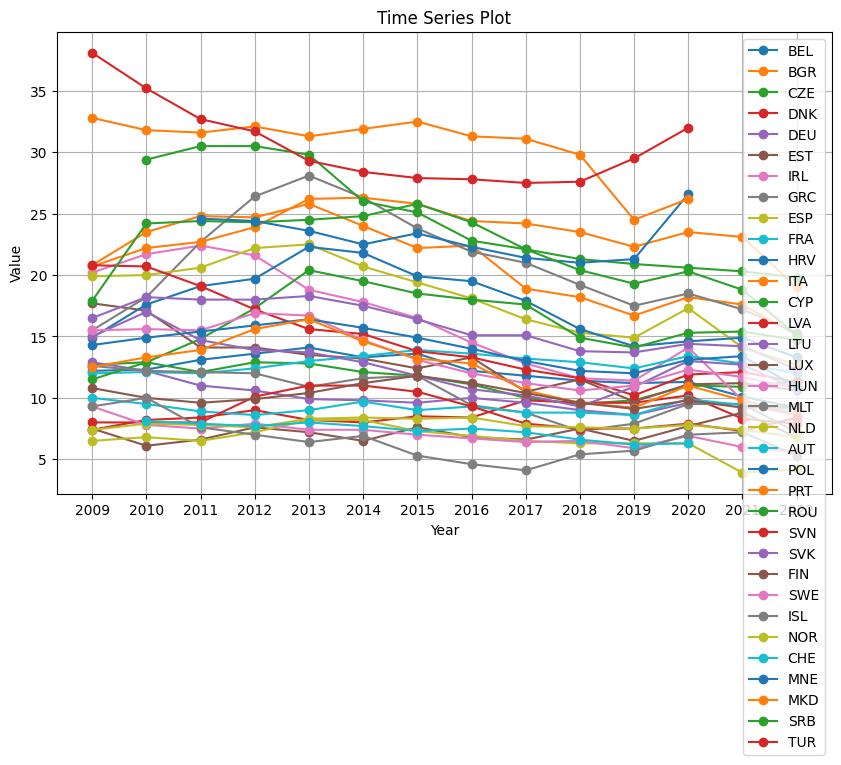

In [136]:
plt.figure(figsize=(10, 6))
countries = []

for idx in range(neet_sheet4.shape[0]):
  row = neet_sheet4.iloc[idx]
  country = row[15]
  countries.append(country)
  values = row[1:15]
  years = row.index[1:15]

  plt.plot(years, values, marker='o', linestyle='-')

plt.legend(labels = countries)
plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Boxplot

### For each year

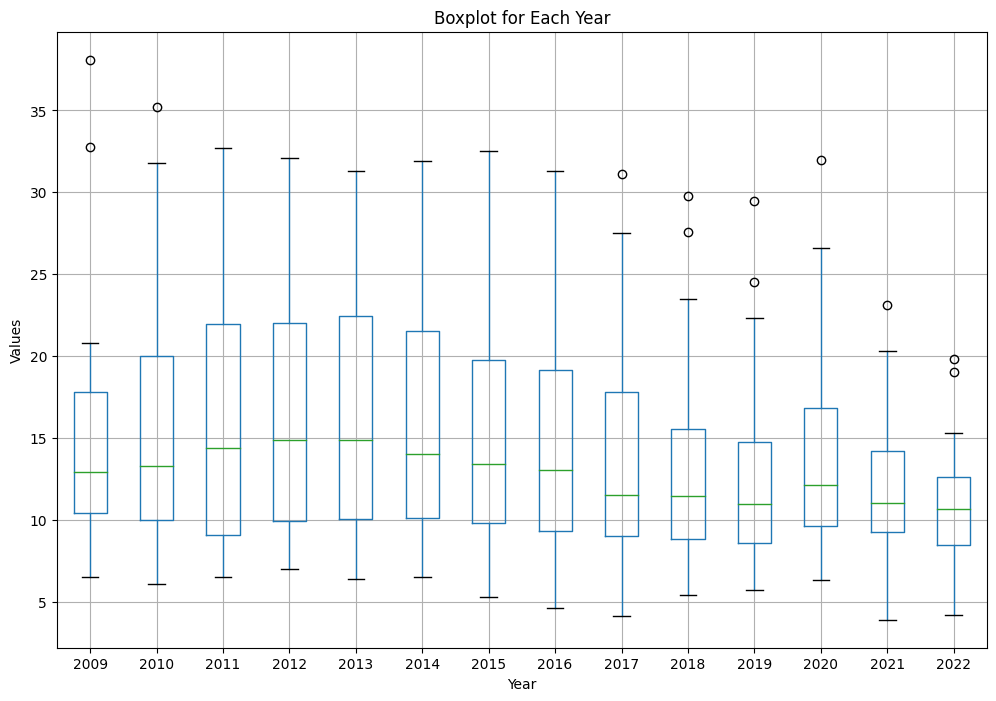

In [137]:
# Boxplot for Each Year
plt.figure(figsize=(12, 8))
neet_sheet4.boxplot()
plt.title('Boxplot for Each Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

### For each country

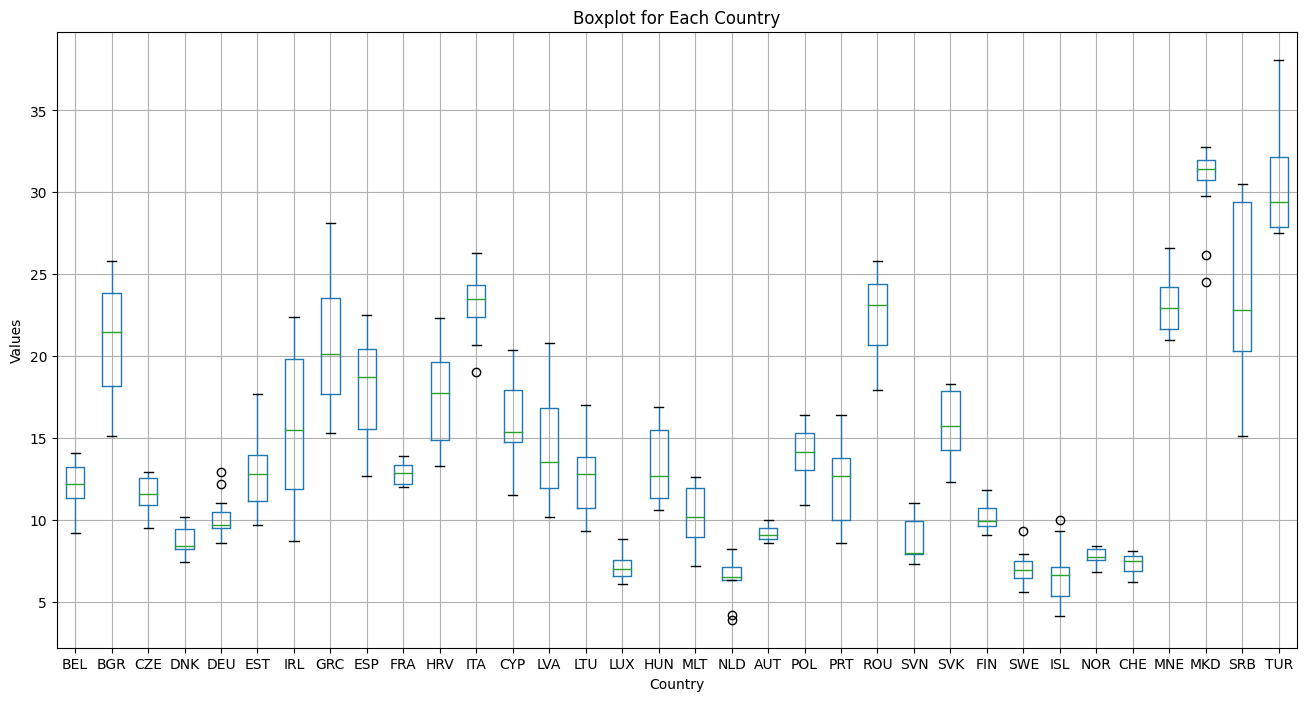

In [138]:
# Boxplot for Each Country
neet_copy = neet_sheet4.copy()
neet_copy.set_index('Abbreviation', inplace = True)
neet_copy.drop(columns = 'Country', inplace = True)
neet_transposed = neet_copy.T
plt.figure(figsize=(16, 8))
neet_transposed.boxplot()
plt.title('Boxplot for Each Country')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

# CSV Files

In [139]:
def create_csv(csv_name, dataset):
  with open(csv_name, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    header = list(dataset.columns)
    writer.writerow(header)
    for idx in range(dataset.shape[0]):
      row = list(dataset.iloc[idx])
      writer.writerow(row)

In [140]:
csv_names = ['neet1_15_24_abs', 'neet2_15_24_per', 'neet3_abs', 'neet4_per', 'neet5_15_24_abs_M', 'neet6_15_24_per_M',
            'neet7_abs_M', 'neet8_per_M', 'neet9_15_24_abs_F', 'neet10_15_24_per_F', 'neet11_abs_F', 'neet12_per_F']
datasets = [neet_sheet1, neet_sheet2, neet_sheet3, neet_sheet4, neet_sheet5, neet_sheet6,
            neet_sheet7, neet_sheet8, neet_sheet9, neet_sheet10, neet_sheet11, neet_sheet12]
for idx in range(len(csv_names)):
  create_csv(csv_names[idx], datasets[idx])

# JSON Files

In [158]:
neet_sheet1.fillna(0., inplace = True)
neet_sheet2.fillna(0., inplace = True)
neet_sheet3.fillna(0., inplace = True)
neet_sheet4.fillna(0., inplace = True)
neet_sheet5.fillna(0., inplace = True)
neet_sheet6.fillna(0., inplace = True)
neet_sheet7.fillna(0., inplace = True)
neet_sheet8.fillna(0., inplace = True)
neet_sheet9.fillna(0., inplace = True)
neet_sheet10.fillna(0., inplace = True)
neet_sheet11.fillna(0., inplace = True)
neet_sheet12.fillna(0., inplace = True)

In [159]:
json_path = "/content/drive/MyDrive/DV_project/europe.json"
with open(json_path, 'r') as file:
    json_file = json.load(file)

In [143]:
state_abbreviations = {
    'Azerbaijan': 'AZE',
    'Albania': 'ALB',
    'Armenia': 'ARM',
    'Bosnia and Herzegovina': 'BIH',
    'Bulgaria': 'BGR',
    'Cyprus': 'CYP',
    'Denmark': 'DNK',
    'Ireland': 'IRL',
    'Estonia': 'EST',
    'Austria': 'AUT',
    'Czech Republic': 'CZE',
    'Finland': 'FIN',
    'France': 'FRA',
    'Georgia': 'GEO',
    'Germany': 'DEU',
    'Greece': 'GRC',
    'Croatia': 'HRV',
    'Hungary': 'HUN',
    'Iceland': 'ISL',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Latvia': 'LVA',
    'Belarus': 'BLR',
    'Lithuania': 'LTU',
    'Slovakia': 'SVK',
    'Liechtenstein': 'LIE',
    'The former Yugoslav Republic of Macedonia': 'MKD',
    'Malta': 'MLT',
    'Belgium': 'BEL',
    'Faroe Islands': 'FRO',
    'Andorra': 'AND',
    'Luxembourg': 'LUX',
    'Monaco': 'MCO',
    'Montenegro': 'MNE',
    'Netherlands': 'NLD',
    'Norway': 'NOR',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Romania': 'ROU',
    'Republic of Moldova': 'MDA',
    'Slovenia': 'SVN',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Turkey': 'TUR',
    'United Kingdom': 'GBR',
    'Ukraine': 'UKR',
    'San Marino': 'SMR',
    'Serbia': 'SRB',
    'Holy See (Vatican City)': 'VAT',
    'Russia': 'RUS',
}

In [160]:
for idx in range(len(json_file['objects']['europe'].get('geometries'))):
  properties = json_file['objects']['europe'].get('geometries')[idx]['properties']
  name = properties['NAME']
  abbreviation = state_abbreviations[name]
  if country_abbreviations_reversed.get(abbreviation) is not None:
    name = country_abbreviations_reversed.get(abbreviation)
  del properties['NAME']
  try:
    row1000 = neet_sheet3[neet_sheet3['Country'] == name].values[0]
    row = neet_sheet3[neet_sheet3['Country'] == name].values[0] * 1000
    abundance1000 = list(row1000)[1:15]
    abundance = list(row)[1:15]
    properties['name'] = name
    properties['abbreviation'] = abbreviation
    properties['abundance'] = abundance
    properties['abundance1000'] = abundance1000
  except:
    abundance = list(np.zeros(14))
    properties['name'] = name
    properties['abbreviation'] = abbreviation
    properties['abundance'] = abundance
    properties['abundance1000'] = abundance

In [145]:
out_path = "/content/choropleth.json"
with open(out_path, 'w') as file:
    json.dump(json_file, file)